In [1]:
import os, sys
import pandas as pd
import numpy as np
import numpy.matlib
import scipy as sp
from pygam import LinearGAM, s, l

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

## Read in data

In [2]:
df_pheno = pd.read_csv('data/df_pheno.csv')
df_pheno.set_index(['bblid','scanid'], inplace = True)
df_pheno.head()

,,squeakycleanExclude,ageAtScan1,ageAtScan1_Years,sex,race2,handednessv2,dti64MeanAbsRMS,dti64MeanRelRMS,dti64MaxAbsRMS,dti64MaxRelRMS,mprage_antsCT_vol_TBV,averageManualRating,Overall_Psychopathology,Psychosis_Positive,Psychosis_NegativeDisorg,AnxiousMisery,Externalizing,Fear
bblid,scanid,,,,,,,,,,,,,,,,,,
81287,2738,0,240,20.0,2,1,1,0.351665,0.154478,0.557358,0.272518,1.497389e+06,2.0,0.314394,-1.109349,-0.572468,1.222410,1.134094,-0.235063
80680,2739,1,253,21.1,1,1,1,0.531246,0.208078,0.754717,0.354560,1.813450e+06,2.0,0.748088,-0.905436,1.414109,0.032372,2.343126,0.744692
81754,2740,1,232,19.3,2,1,1,0.310943,0.218462,0.460633,0.387235,1.364954e+06,2.0,1.381240,0.986549,-0.969899,0.301802,-0.313214,-0.344655
81903,2749,0,231,19.2,2,1,1,0.432610,0.283153,0.819576,0.509537,1.266520e+06,2.0,0.531327,-0.885234,0.085093,1.994165,-0.831330,-1.902806
81043,2750,0,249,20.8,2,2,1,0.162409,0.096761,0.429102,0.259678,1.254653e+06,2.0,-0.330777,-0.788469,-0.798989,-2.036093,-0.072305,-0.746145


In [3]:
df_system = pd.read_csv('data/df_system.csv')
df_system.set_index(['bblid','scanid'], inplace = True)
df_system.head()

,,ct,jd,ct_1,ct_2,ct_3,ct_4,ct_5,ct_6,ct_7,ct_8,...,jd_8,jd_9,jd_10,jd_11,jd_12,jd_13,jd_14,jd_15,jd_16,jd_17
bblid,scanid,,,,,,,,,,,,,,,,,,,,,
81287,2738,-0.244481,0.000682,-0.447502,-0.484110,-0.045826,-0.111647,-0.356220,-0.331039,-0.107237,-0.263501,...,-0.018313,0.059466,0.038632,-0.104141,-0.069048,-0.025119,0.033855,-0.005589,-0.012419,0.082375
80680,2739,-0.293535,-0.038376,-0.075566,-0.064355,-0.119455,-0.216842,-0.382597,-0.296695,-0.424994,-0.626117,...,-0.035643,-0.099134,-0.056971,-0.008471,-0.118097,-0.090080,-0.082227,-0.059138,0.031980,-0.055984
81754,2740,-0.115790,0.016437,0.155023,0.453592,-0.143237,-0.272653,-0.038651,-0.186689,-0.287686,-0.352952,...,-0.053909,-0.013814,-0.006453,0.057462,0.035556,-0.010350,-0.014886,-0.007110,-0.030681,-0.064011
81903,2749,-0.015776,-0.027930,-0.067138,-0.191562,0.118769,-0.160779,0.090528,0.025191,-0.088359,-0.248205,...,-0.047253,-0.054776,0.010141,-0.027603,-0.048177,0.058807,-0.034837,0.012315,0.026092,0.006368
81043,2750,0.045987,0.028378,-0.386811,-0.311837,-0.002629,0.262060,-0.096561,0.289440,0.041003,0.246226,...,-0.060398,-0.014248,0.004987,0.014552,0.067147,0.036815,-0.003796,0.030978,0.069522,0.109241


Get some data

In [4]:
metric = 'jd'
X = df_pheno.loc[:, 'ageAtScan1_Years']
Y = df_system.loc[:, metric]

Estimate GAM with spline

In [5]:
gam = LinearGAM(s(0)).fit(X, Y)
gam.gridsearch(X, Y)

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


LinearGAM(callbacks=[Deviance(), Diffs()], fit_intercept=True, 
   max_iter=100, scale=None, terms=s(0) + intercept, tol=0.0001, 
   verbose=False)

Plot

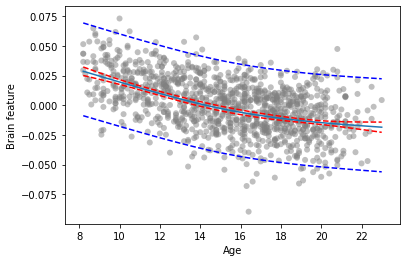

In [6]:
XX = gam.generate_X_grid(term=0)
pdep, confi = gam.partial_dependence(term=0, X=XX, width=0.95)

plt.figure()
plt.plot(XX, pdep) # fit
plt.plot(XX, confi, c='r', ls='--') # confidence interval
plt.plot(XX, gam.prediction_intervals(XX, width=.95), color='b', ls='--') # 95% prediction interval
plt.scatter(X, Y, facecolor='gray', edgecolors='none', alpha = 0.5) # data
plt.xlabel('Age')
plt.ylabel('Brain feature')
plt.show()

In [7]:
metric = 'jd'
X = df_pheno.loc[:, ['ageAtScan1_Years','mprage_antsCT_vol_TBV']]
Y = df_system.loc[:, metric]

Estimate GAM with spline

In [8]:
gam = LinearGAM(s(0) + s(1)).fit(X, Y)
gam.gridsearch(X, Y)

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


LinearGAM(callbacks=[Deviance(), Diffs()], fit_intercept=True, 
   max_iter=100, scale=None, terms=s(0) + s(1) + intercept, 
   tol=0.0001, verbose=False)

Plot

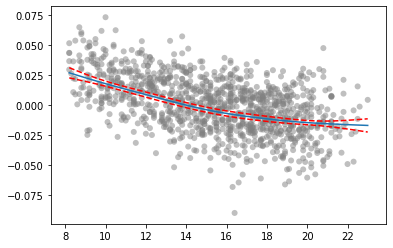

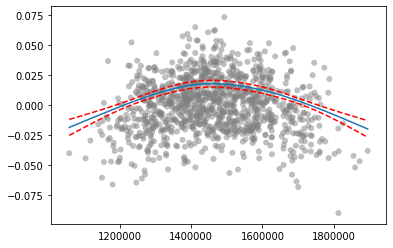

In [9]:
for i, term in enumerate(gam.terms):
    if term.isintercept:
        continue

    XX = gam.generate_X_grid(term=i)
    pdep, confi = gam.partial_dependence(term=i, X=XX, width=0.95)

    plt.figure()
    plt.plot(XX[:, term.feature], pdep) # fit
    plt.plot(XX[:, term.feature], confi, c='r', ls='--') # confidence interval
    plt.scatter(X.iloc[:,i], Y, facecolor='gray', edgecolors='none', alpha = 0.5) # data
    plt.show()